In [ ]:
# Para visualización en notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_context('poster')
mpl.rcParams['figure.figsize'] = (8,6)

# Números y Datos
import numpy as np
import pandas as pd

import networkx as nx
import community.community_louvain as community_louvain

from glob import glob
from pathlib import Path

In [ ]:
!wget -q https://www.dropbox.com/s/eei6gnw10o20mcn/DataSujetos.zip?dl=1 -O DataSujetos.zip
!unzip -q DataSujetos

replace DataSujetos/N1_suj8.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
def avg_corr_matrix(filenames):
    n = len(filenames)
    acum = np.zeros((116,116))
    for filename in filenames:
      acum += pd.read_csv(filename, header=None)
      
        
    return acum/n

In [ ]:
filenames_N1 = list(Path('DataSujetos').glob('N1_*.csv'))
filenames_N2 = list(Path('DataSujetos').glob('N2_*.csv'))
filenames_N3 = list(Path('DataSujetos').glob('N3_*.csv'))
filenames_W  = list(Path('DataSujetos').glob('W_*.csv'))

In [ ]:
avg_N1 = avg_corr_matrix(filenames_N1)
avg_N2 = avg_corr_matrix(filenames_N2)
avg_N3 = avg_corr_matrix(filenames_N3)
avg_W  = avg_corr_matrix(filenames_W)

In [ ]:
def comunidades_QyNc(df,densities):
  n = df.shape[0]
  df -= np.diag(np.ones(n))
  max_links = (n*n-n)//2
  tril_idx = np.tril_indices(n,-1)
  sorted_correlations = sorted(df.values[tril_idx].flatten(),reverse=True)
  modularidad = []
  num_comunidades = []
  densidad = [] 
  
  for d in densities:
    idx = int(d*max_links)
    threshold = sorted_correlations[idx]
    G=nx.from_pandas_adjacency(df>=threshold)

    louvain_partition_i = community_louvain.best_partition(G)
    values_obs_i = [v for n,v in louvain_partition_i.items()]
    modularidad_louvain_i = community_louvain.modularity(louvain_partition_i, G)
    modularidad.append(modularidad_louvain_i)
    num_comunidades_louvain_i = max(values_obs_i)
    num_comunidades.append(num_comunidades_louvain_i)
    densidad.append(nx.density(G))
  return modularidad, num_comunidades, densidad

In [ ]:
densities = np.linspace(0.00001,.99999,50)
modularidad_W, num_comunidades_W, densidad_W = comunidades_QyNc(avg_W,densities)
modularidad_N1, num_comunidades_N1, densidad_N1 = comunidades_QyNc(avg_N1,densities)
modularidad_N2, num_comunidades_N2, densidad_N2 = comunidades_QyNc(avg_N2,densities)
modularidad_N3, num_comunidades_N3, densidad_N3 = comunidades_QyNc(avg_N3,densities)

In [ ]:
def comunidades_QyNc_randomG(df,densities):
  n = df.shape[0]
  df -= np.diag(np.ones(n))
  max_links = (n*n-n)//2
  tril_idx = np.tril_indices(n,-1)
  sorted_correlations = sorted(df.values[tril_idx].flatten(),reverse=True)
  modularidad = []
  num_comunidades = []
  densidad = [] 
  for d in densities:
    idx = int(d*max_links)
    threshold = sorted_correlations[idx]
      
    G_orig=nx.from_pandas_adjacency(df>=threshold)
    G=nx.expected_degree_graph([v for k, v in G_orig.degree])

    louvain_partition_i = community_louvain.best_partition(G)
    values_obs_i = [v for n,v in louvain_partition_i.items()]
    modularidad_louvain_i = community_louvain.modularity(louvain_partition_i, G)
    modularidad.append(modularidad_louvain_i)
    num_comunidades_louvain_i = max(values_obs_i)
    num_comunidades.append(num_comunidades_louvain_i)
    densidad.append(nx.density(G))
  return modularidad, num_comunidades, densidad
  

In [ ]:
rand_modularidad_W, rand_num_comunidades_W, rand_densidad_W = comunidades_QyNc_randomG(avg_W,densities)
rand_modularidad_N1, rand_num_comunidades_N1, rand_densidad_N1 = comunidades_QyNc_randomG(avg_N1,densities)
rand_modularidad_N2, rand_num_comunidades_N2, rand_densidad_N2 = comunidades_QyNc_randomG(avg_N2,densities)
rand_modularidad_N3, rand_num_comunidades_N3, rand_densidad_N3 = comunidades_QyNc_randomG(avg_N3,densities)

ValueError: ignored

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(densidad_W,modularidad_W,'.-',color="black",label="W")
ax1.plot(densidad_N1,modularidad_N1,'.-',color="Green",label="N1")
plt.xlim(0.015, 1.05) 
plt.title("W vs N1 louvain")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Modularidad');

left, bottom, width, height = [0.6, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.plot(rand_densidad_W,rand_modularidad_W,'.-',color="black",label="W")
ax2.plot(rand_densidad_N1,rand_modularidad_N1,'.-',color="Green",label="N1")
ax2.set_xlim(0.015, 1.05) 
ax2.set_title("Random")
#ax2.xlabel('Densidad de enlaces')
#ax2.ylabel('Modularidad');

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(densidad_W,modularidad_W,'.-',color="black",label="W")
ax1.plot(densidad_N2,modularidad_N2,'.-',color="Blue",label="N2")
plt.xlim(0.015, 1.05) 
plt.title("W vs N2 louvain")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Modularidad');

left, bottom, width, height = [0.6, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.plot(rand_densidad_W,rand_modularidad_W,'.-',color="black",label="W")
ax2.plot(rand_densidad_N2,rand_modularidad_N2,'.-',color="Blue",label="N2")
ax2.set_xlim(0.015, 1.05) 
ax2.set_title("Random")

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(densidad_W,modularidad_W,'.-',color="black",label="W")
ax1.plot(densidad_N3,modularidad_N3,'.-',color="Red",label="N3")
plt.xlim(0.015, 1.05) 
plt.title("W vs N3 louvain")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Modularidad');

left, bottom, width, height = [0.6, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.plot(rand_densidad_W,rand_modularidad_W,'.-',color="black",label="W")
ax2.plot(rand_densidad_N3,rand_modularidad_N3,'.-',color="Red",label="N3")
ax2.set_xlim(0.015, 1.05) 
ax2.set_title("Random")

In [ ]:
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
plt.plot(densidad_W,modularidad_W,'.-',color="black",label="W")
plt.plot(densidad_N1,modularidad_N1,'.-',color="Green",label="N1")
plt.xlim(0.015, 1.05) 
plt.title("W vs N1 louvain")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Modularidad');

plt.subplot(1,3,2)
plt.plot(densidad_W,modularidad_W,'.-',color="black",label="W")
plt.plot(densidad_N2,modularidad_N2,'.-',color="blue",label="N2")
plt.xlim(0.015, 1.05) 
plt.title("W vs N2 louvain")
plt.xlabel('Densidad de enlaces')


plt.subplot(1,3,3)
plt.plot(densidad_W,modularidad_W,'.-',color="black",label="W")
plt.plot(densidad_N3,modularidad_N3,'.-',color="red",label="N3")
plt.xlim(0.015, 1.05) 
plt.title("W vs N3 louvain")
plt.xlabel('Densidad de enlaces')

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(densidad_W,num_comunidades_W,'.-',color="black",label="W")
ax1.plot(densidad_N1,num_comunidades_N1,'.-',color="Green",label="N1")
plt.xlim(0.01, 0.95) 
plt.ylim(0, 30) 
plt.title("W vs N1 louvain")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Cantidad de Comunidades');

left, bottom, width, height = [0.6, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.plot(rand_densidad_W,rand_num_comunidades_W,'.-',color="black",label="W")
ax2.plot(rand_densidad_N1,rand_num_comunidades_N1,'.-',color="Green",label="N1")
ax2.set_xlim(0.01, 0.95) 
ax2.set_ylim(0, 30) 
ax2.set_title("Random")
#ax2.xlabel('Densidad de enlaces')
#ax2.ylabel('Modularidad');

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(densidad_W,num_comunidades_W,'.-',color="black",label="W")
ax1.plot(densidad_N2,num_comunidades_N2,'.-',color="Blue",label="N2")
plt.xlim(0.01, 0.95) 
plt.ylim(0, 30) 
plt.title("W vs N2 louvain")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Cantidad de Comunidades');

left, bottom, width, height = [0.6, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.plot(rand_densidad_W,rand_num_comunidades_W,'.-',color="black",label="W")
ax2.plot(rand_densidad_N2,rand_num_comunidades_N2,'.-',color="Blue",label="N2")
ax2.set_xlim(0.01, 0.95) 
ax2.set_ylim(0, 30) 
ax2.set_title("Random")

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(densidad_W,num_comunidades_W,'.-',color="black",label="W")
ax1.plot(densidad_N3,num_comunidades_N3,'.-',color="Red",label="N3")
plt.xlim(0.01, 0.95) 
plt.ylim(0, 30) 
plt.title("W vs N3 louvain")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Cantidad de Comunidades');

left, bottom, width, height = [0.6, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.plot(rand_densidad_W,rand_num_comunidades_W,'.-',color="black",label="W")
ax2.plot(rand_densidad_N3,rand_num_comunidades_N3,'.-',color="Red",label="N3")
ax2.set_xlim(0.01, 0.95) 
ax2.set_ylim(0, 30) 
ax2.set_title("Random")

In [ ]:
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
plt.plot(densidad_W,num_comunidades_W,'.-',color="black",label="W")
plt.plot(densidad_N1,num_comunidades_N1,'.-',color="Green",label="N1")
plt.xlim(0.05, 0.95) 
plt.ylim(0, 30) 
plt.title("W vs N1 louvain")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Cantidad de Comunidades');

plt.subplot(1,3,2)
plt.plot(densidad_W,num_comunidades_W,'.-',color="black",label="W")
plt.plot(densidad_N2,num_comunidades_N2,'.-',color="blue",label="N2")
plt.xlim(0.05, 0.95) 
plt.ylim(0, 30) 
plt.title("W vs N2 louvain")
plt.xlabel('Densidad de enlaces')


plt.subplot(1,3,3)
plt.plot(densidad_W,num_comunidades_W,'.-',color="black",label="W")
plt.plot(densidad_N3,num_comunidades_N3,'.-',color="red",label="N3")
plt.xlim(0.05, 0.95) 
plt.ylim(0, 30) 
plt.title("W vs N3 louvain")
plt.xlabel('Densidad de enlaces')

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(densidad_W,modularidad_W,'.-',color="black",label="W")
ax1.plot(densidad_N1,modularidad_N1,'.-',color="Green",label="N1")
plt.title("W vs N1 louvain")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Modularidad');

left, bottom, width, height = [0.6, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.plot(rand_densidad_W,rand_modularidad_W,'.-',color="black",label="W")
ax2.plot(rand_densidad_N1,rand_modularidad_N1,'.-',color="Green",label="N1")
ax2.set_title("Random")
#ax2.xlabel('Densidad de enlaces')
#ax2.ylabel('Modularidad');

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(densidad_W,modularidad_W,'.-',color="black",label="W")
ax1.plot(densidad_N2,modularidad_N2,'.-',color="Blue",label="N2")
plt.title("W vs N2 louvain")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Modularidad');

left, bottom, width, height = [0.6, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.plot(rand_densidad_W,rand_modularidad_W,'.-',color="black",label="W")
ax2.plot(rand_densidad_N2,rand_modularidad_N2,'.-',color="Blue",label="N2")
ax2.set_title("Random")

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(densidad_W,modularidad_W,'.-',color="black",label="W")
ax1.plot(densidad_N3,modularidad_N3,'.-',color="Red",label="N3")
plt.title("W vs N3 louvain")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Modularidad');

left, bottom, width, height = [0.6, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.plot(rand_densidad_W,rand_modularidad_W,'.-',color="black",label="W")
ax2.plot(rand_densidad_N3,rand_modularidad_N3,'.-',color="Red",label="N3")
ax2.set_title("Random")

In [ ]:
plt.plot(densidad_W,num_comunidades_W,'.-',color="black",label="W")
plt.plot(densidad_N1,num_comunidades_N1,'.-',color="Green",label="N1")
plt.title("W vs N1 louvain")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Num Comunidades');

In [ ]:
plt.plot(densidad_W,modularidad_W,'.-',color="black",label="W")
plt.plot(densidad_N2,modularidad_N2,'.-',color="blue",label="N2")
plt.title("W vs N2 louvain")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Modularidad');

In [ ]:
plt.plot(densidad_W,num_comunidades_W,'.-',color="black",label="W")
plt.plot(densidad_N2,num_comunidades_N2,'.-',color="blue",label="N2")
plt.title("W vs N2 louvain")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Num Comunidades');

In [ ]:
plt.plot(densidad_W,modularidad_W,'.-',color="black",label="W")
plt.plot(densidad_N3,modularidad_N3,'.-',color="red",label="N3")
plt.title("W vs N3 louvain")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Modularidad');

In [ ]:
plt.plot(densidad_W,num_comunidades_W,'.-',color="black",label="W")
plt.plot(densidad_N3,num_comunidades_N3,'.-',color="red",label="N3")
plt.title("W vs N3 louvain")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Num Comunidades');

In [ ]:
def comunidades_QyNc_randomG(df,densities):
  n = df.shape[0]
  df -= np.diag(np.ones(n))
  max_links = (n*n-n)//2
  tril_idx = np.tril_indices(n,-1)
  sorted_correlations = sorted(df.values[tril_idx].flatten(),reverse=True)
  modularidad = []
  num_comunidades = []
  densidad = [] 
  for d in densities:
    idx = int(d*max_links)
    threshold = sorted_correlations[idx]
      
    G_orig=nx.from_pandas_adjacency(df>=threshold)
    G=nx.expected_degree_graph([v for k, v in G_orig.degree])

    louvain_partition_i = community_louvain.best_partition(G)
    values_obs_i = [v for n,v in louvain_partition_i.items()]
    modularidad_louvain_i = community_louvain.modularity(louvain_partition_i, G)
    modularidad.append(modularidad_louvain_i)
    num_comunidades_louvain_i = max(values_obs_i)
    num_comunidades.append(num_comunidades_louvain_i)
    densidad.append(nx.density(G))
  return modularidad, num_comunidades, densidad
  


In [ ]:
rand_modularidad_W, rand_num_comunidades_W, rand_densidad_W = comunidades_QyNc_randomG(avg_W,densities)
rand_modularidad_N1, rand_num_comunidades_N1, rand_densidad_N1 = comunidades_QyNc_randomG(avg_N1,densities)
rand_modularidad_N2, rand_num_comunidades_N2, rand_densidad_N2 = comunidades_QyNc_randomG(avg_N2,densities)
rand_modularidad_N3, rand_num_comunidades_N3, rand_densidad_N3 = comunidades_QyNc_randomG(avg_N3,densities)

In [ ]:
fig, ax1 = plt.subplots()



left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])


ax1.plot(densidad_W,modularidad_W,'.-',color="black",label="W")
ax1.plot(densidad_N1,modularidad_N1,'.-',color="Green",label="N1")
plt.title("W vs N1 louvain")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Modularidad');

ax2.plot(rand_densidad_W,rand_modularidad_W,'.-',color="black",label="W")
ax2.plot(rand_densidad_N1,rand_modularidad_N1,'.-',color="Green",label="N1")
ax2.title("Random")
ax2.xlabel('Densidad de enlaces')
ax2.ylabel('Modularidad');

In [ ]:
plt.plot(rand_densidad_W,rand_modularidad_W,'.-',color="black",label="W")
plt.plot(rand_densidad_N1,rand_modularidad_N1,'.-',color="Green",label="N1")
plt.title("Random")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Modularidad');

In [ ]:
plt.plot(rand_densidad_W,rand_num_comunidades_W,'.-',color="black",label="W")
plt.plot(rand_densidad_N1,rand_num_comunidades_N1,'.-',color="Green",label="N1")
plt.title("Random")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Num Comunidades');

In [ ]:
plt.plot(rand_densidad_W,rand_modularidad_W,'.-',color="black",label="W")
plt.plot(rand_densidad_N2,rand_modularidad_N2,'.-',color="blue",label="N2")
plt.title("Random")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Modularidad');

In [ ]:
plt.plot(rand_densidad_W,rand_num_comunidades_W,'.-',color="black",label="W")
plt.plot(rand_densidad_N2,rand_num_comunidades_N2,'.-',color="blue",label="N2")
plt.title("Random")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Num Comunidades');

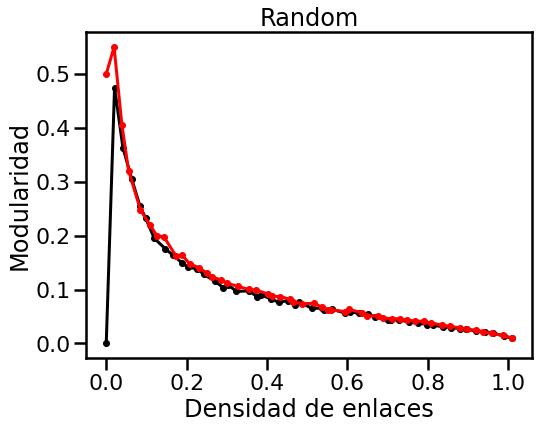

In [ ]:
plt.plot(rand_densidad_W,rand_modularidad_W,'.-',color="black",label="W")
plt.plot(rand_densidad_N3,rand_modularidad_N3,'.-',color="red",label="N3")
plt.title("Random")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Modularidad');

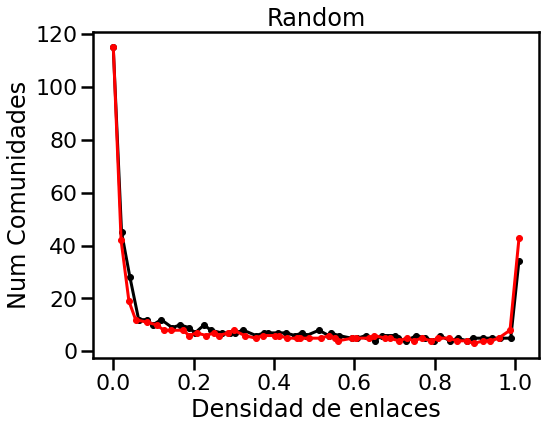

In [ ]:
plt.plot(rand_densidad_W,rand_num_comunidades_W,'.-',color="black",label="W")
plt.plot(rand_densidad_N3,rand_num_comunidades_N3,'.-',color="red",label="N3")
plt.title("Random")
plt.xlabel('Densidad de enlaces')
plt.ylabel('Num Comunidades');

In [ ]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 6.9 MB/s 


In [ ]:
from nilearn import datasets

aal = datasets.fetch_atlas_aal()


Dataset created in /root/nilearn_data/aal_SPM12



 ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/aal_SPM12/9845813e2300e5b614a9dd2713e13445/aal_for_SPM12.tar.gz..... done.


In [ ]:
from nilearn import plotting
coordinates = plotting.find_parcellation_cut_coords(labels_img=aal['maps'])

In [ ]:
def color_coded_adyacency_matrix(community_dict):
  A = np.zeros((116,116))
  for i in range(0,116):
    for j in range(0,116):
      if (community_dict[i] != community_dict[j]):
        A[i,j] = 1
      elif ((community_dict[i] == community_dict[j]) & (i != j)):
        A[i,j] = community_dict[i] + 2
  return A

In [ ]:
filenames_N1 = list(Path('DataSujetos').glob('N1_*.csv'))
filenames_N2 = list(Path('DataSujetos').glob('N2_*.csv'))
filenames_N3 = list(Path('DataSujetos').glob('N3_*.csv'))
filenames_W  = list(Path('DataSujetos').glob('W_*.csv'))

In [ ]:
def binarize(matrix, density):
    
    n = matrix.shape[0]
    matrix -= np.diag(np.ones(n))
    max_links = (n*n-n)//2
    tril_idx = np.tril_indices(n,-1)
    sorted_correlations = sorted(matrix.values[tril_idx].flatten(),reverse=True)
    
    idx = int(density*max_links)
    threshold = sorted_correlations[idx]
    
    return matrix>=threshold

In [ ]:
def avg_adj_matrix(filenames,density):
    n = len(filenames)
    acum = np.zeros((116,116))
    for filename in filenames:
      acum += binarize(pd.read_csv(filename, header=None),density)
      
        
    return nx.from_pandas_adjacency(acum/n)

In [ ]:
density = 0.075
avg_N1 = avg_adj_matrix(filenames_N1,density)
avg_N2 = avg_adj_matrix(filenames_N2,density)
avg_N3 = avg_adj_matrix(filenames_N3,density)
avg_W  = avg_adj_matrix(filenames_W,density)

In [ ]:
G_av_W_2=avg_W
louvain_partition_i = community_louvain.best_partition(G_av_W_2)
values_obs_i = [v for n,v in louvain_partition_i.items()]
modularidad_louvain_i = community_louvain.modularity(louvain_partition_i, G_av_W_2)
modularidad.append(modularidad_louvain_i)
num_comunidades_louvain_i = max(values_obs_i)
num_comunidades.append(num_comunidades_louvain_i)
densidad.append(nx.density(G_av_W_2))

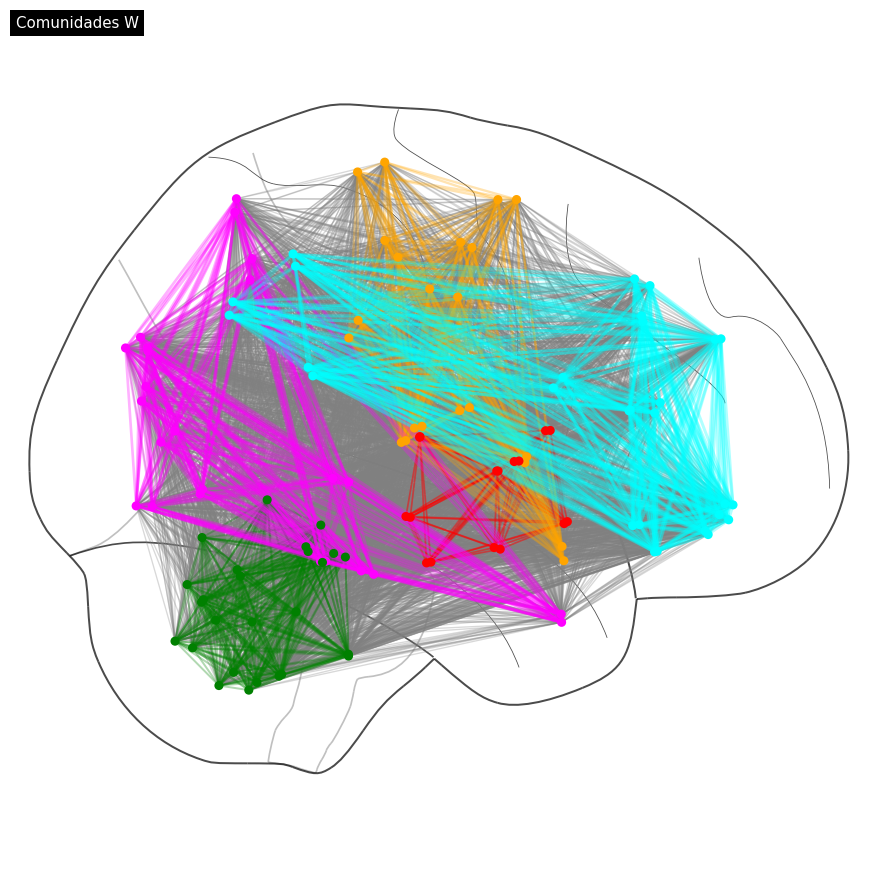

In [ ]:
color = {0:'red',1:'green',2:'orange',3:'magenta',4:'cyan',5:'blue',6:'yellow'} #colores de nodos
cmap = mpl.colors.ListedColormap(["grey","red", "blue", "green", "orange","yellow","magenta","cyan"]) #colores de vértices, tener en mente que el plot los usa de forma extraña
node_color = [color[v] for i,v in louvain_partition_i.items()]
figW = plt.figure(figsize = (12,12))
plotting.plot_connectome(color_coded_adyacency_matrix(louvain_partition_i), coordinates,
                         title='Comunidades W',
                         display_mode = 'x',
                         edge_cmap = cmap,
                         edge_vmin = 1,
                         edge_vmax = 6,
                         node_color = node_color,
                         edge_kwargs = {'alpha':0.3},
                         figure = figW);

In [ ]:
df= avg_W
n = df.shape[0]
df -= np.diag(np.ones(n))
max_links = (n*n-n)//2
tril_idx = np.tril_indices(n,-1)
sorted_correlations = sorted(df.values[tril_idx].flatten(),reverse=True)
modularidad = []
num_comunidades = []
densidad = [] 
d = 0.2
idx = int(d*max_links)
threshold = sorted_correlations[idx]
      
G_av_W_2=nx.from_pandas_adjacency(df>=threshold)


louvain_partition_i = community_louvain.best_partition(G_av_W_2)
values_obs_i = [v for n,v in louvain_partition_i.items()]
modularidad_louvain_i = community_louvain.modularity(louvain_partition_i, G_av_W_2)
modularidad.append(modularidad_louvain_i)
num_comunidades_louvain_i = max(values_obs_i)
num_comunidades.append(num_comunidades_louvain_i)
densidad.append(nx.density(G_av_W_2))


In [ ]:
num_comunidades_louvain_i

6

In [ ]:
from networkx.algorithms import community

communities_generator_girvan_newman = community.girvan_newman(G_av_W_2)
gn_partition =[]
modularidad_gn = []
for next_com_gn in communities_generator_girvan_newman:
  #print(next_com_gn)
  node_groups = []
  for com in next_com_gn:
      node_groups.append(list(com))

  girvan_newman_partition = {} #empty dic
  keys = range(116)

  for i in keys:
    value=-100
    for com in range(len(node_groups)):
      if i in node_groups[com]:
        value = com
        #print(i,com)
    girvan_newman_partition[i] = value
  gn_partition.append(girvan_newman_partition)
  modularidad_girvan_newman = community_louvain.modularity(girvan_newman_partition, G_av_W_2)
  modularidad_gn.append(modularidad_girvan_newman)

In [ ]:
girvan_newman_partition = gn_partition[modularidad_gn.index(max(modularidad_gn))]
values_obs_girvan_newman = [v for n,v in girvan_newman_partition.items()]

In [ ]:
num_comunidades_girvan_newman_i = max(values_obs_girvan_newman)
num_comunidades_girvan_newman_i

29

In [ ]:
df= avg_N1
n = df.shape[0]
df -= np.diag(np.ones(n))
max_links = (n*n-n)//2
tril_idx = np.tril_indices(n,-1)
sorted_correlations = sorted(df.values[tril_idx].flatten(),reverse=True)
modularidad = []
num_comunidades = []
densidad = [] 
d = 0.2
idx = int(d*max_links)
threshold = sorted_correlations[idx]
      
G_av_N1_2=nx.from_pandas_adjacency(df>=threshold)


louvain_partition_i = community_louvain.best_partition(G_av_N1_2)
values_obs_i = [v for n,v in louvain_partition_i.items()]
modularidad_louvain_i = community_louvain.modularity(louvain_partition_i, G_av_N1_2)
modularidad.append(modularidad_louvain_i)
num_comunidades_louvain_i = max(values_obs_i)
num_comunidades.append(num_comunidades_louvain_i)
densidad.append(nx.density(G_av_N1_2))

  

In [ ]:
num_comunidades_louvain_i

8

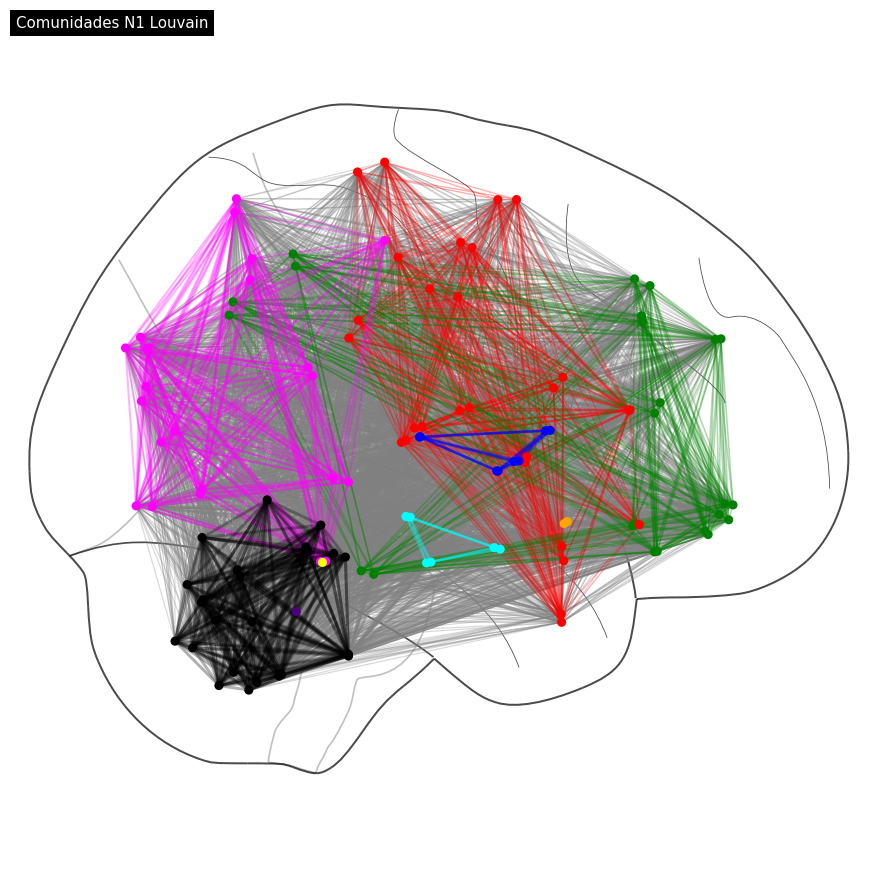

In [ ]:
color = {0:'red',1:'green',2:'orange',3:'magenta',4:'cyan',5:'blue',6:'yellow',7:"indigo", 8:"black"} #colores de nodos
cmap = mpl.colors.ListedColormap(["grey","red","green","orange","magenta","cyan","blue",'yellow',"indigo","black"])
    #"grey","red", "blue", "green", "orange","yellow","magenta","cyan","violet","black"]) #colores de vértices, tener en mente que el plot los usa de forma extraña
node_color = [color[v] for i,v in louvain_partition_i.items()]
figW = plt.figure(figsize = (12,12))
plotting.plot_connectome(color_coded_adyacency_matrix(louvain_partition_i), coordinates,
                         title='Comunidades N1 Louvain',
                         display_mode = 'x',
                         edge_cmap = cmap,
                         edge_vmin = 1,
                         edge_vmax = 10,
                         node_color = node_color,
                         edge_kwargs = {'alpha':0.3},
                         figure = figW);

In [ ]:
from networkx.algorithms import community

communities_generator_girvan_newman = community.girvan_newman(G_av_N1_2)
gn_partition =[]
modularidad_gn = []
for next_com_gn in communities_generator_girvan_newman:
  #print(next_com_gn)
  node_groups = []
  for com in next_com_gn:
      node_groups.append(list(com))

  girvan_newman_partition = {} #empty dic
  keys = range(116)

  for i in keys:
    value=-100
    for com in range(len(node_groups)):
      if i in node_groups[com]:
        value = com
        #print(i,com)
    girvan_newman_partition[i] = value
  gn_partition.append(girvan_newman_partition)
  modularidad_girvan_newman = community_louvain.modularity(girvan_newman_partition, G_av_N1_2)
  modularidad_gn.append(modularidad_girvan_newman)

In [ ]:
girvan_newman_partition = gn_partition[modularidad_gn.index(max(modularidad_gn))]
values_obs_girvan_newman = [v for n,v in girvan_newman_partition.items()]

In [ ]:
num_comunidades_girvan_newman_i = max(values_obs_girvan_newman)
num_comunidades_girvan_newman_i

6

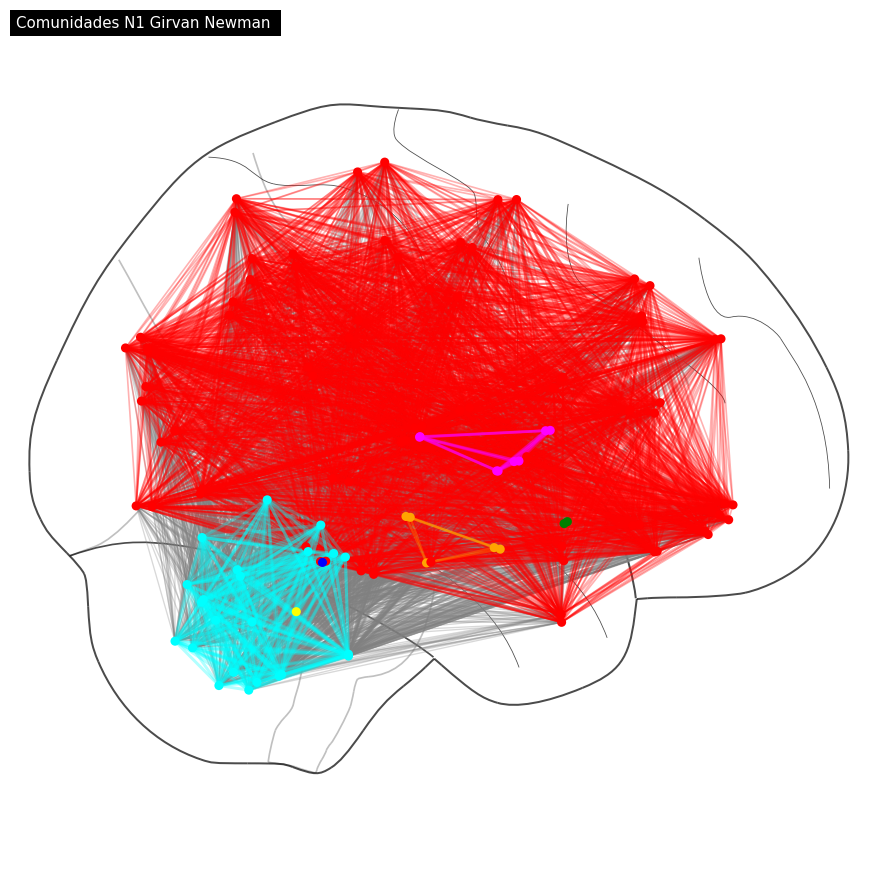

In [ ]:
color = {0:'red',1:'green',2:'orange',3:'magenta',4:'cyan',5:'blue',6:'yellow'} #colores de nodos
cmap = mpl.colors.ListedColormap(["grey","red", "blue", "green", "orange","yellow","magenta","cyan"]) #colores de vértices, tener en mente que el plot los usa de forma extraña
node_color = [color[v] for i,v in girvan_newman_partition.items()]
figW = plt.figure(figsize = (12,12))
plotting.plot_connectome(color_coded_adyacency_matrix(girvan_newman_partition), coordinates,
                         title='Comunidades N1 Girvan Newman ',
                         display_mode = 'x',
                         edge_cmap = cmap,
                         edge_vmin = 1,
                         edge_vmax = 6,
                         node_color = node_color,
                         edge_kwargs = {'alpha':0.3},
                         figure = figW);

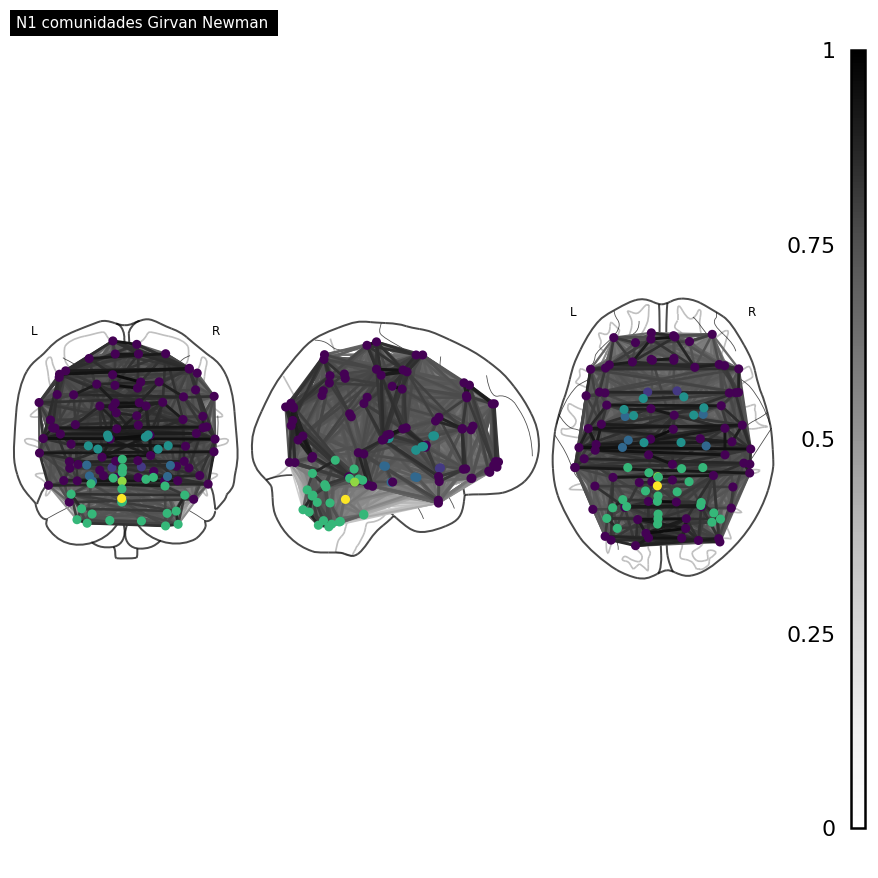

In [ ]:

fig = plt.figure(figsize = (12,12))
plotting.plot_connectome(avg_N1, coordinates,
                         edge_threshold="0%",
                         title='N1 comunidades Girvan Newman ',
                         display_mode = 'ortho', #‘ortho’, ‘x’, ‘y’, ‘z’, ‘xz’, ‘yx’, ‘yz’, ‘l’, ‘r’, ‘lr’, ‘lzr’, ‘lyr’, ‘lzry’, ‘lyrz’
                         edge_cmap = 'Greys',
                         edge_vmin = 0,
                         edge_vmax = 1,
                         figure = fig,
                         colorbar = True,
                         node_color = values_obs_girvan_newman)

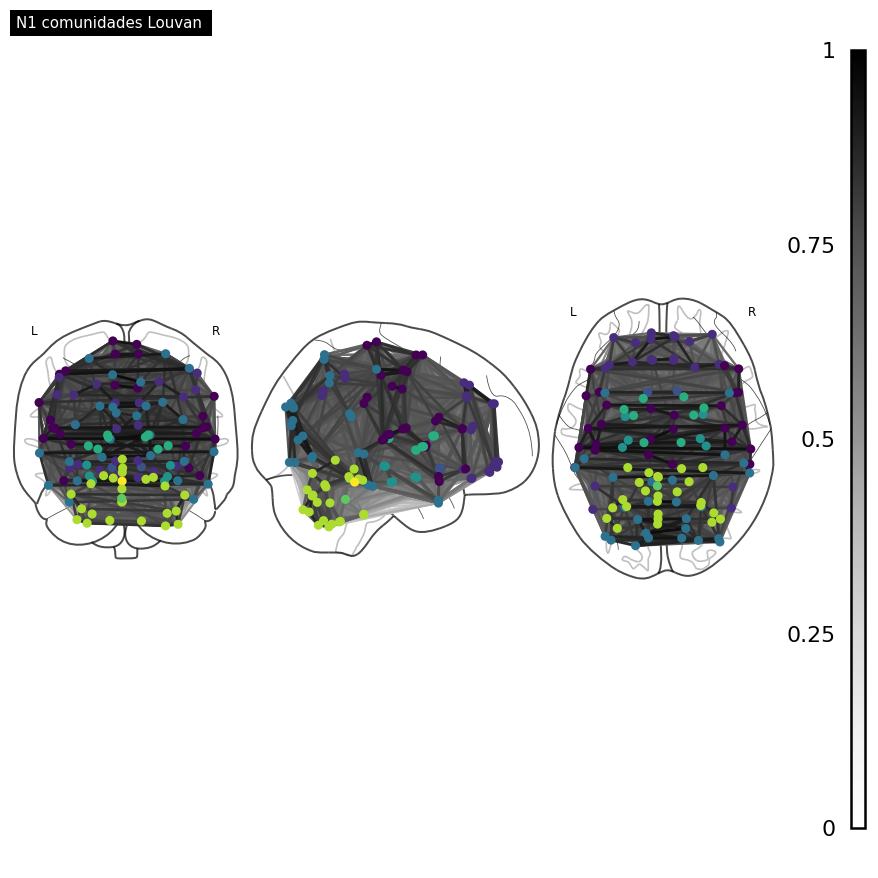

In [ ]:

fig = plt.figure(figsize = (12,12))
plotting.plot_connectome(avg_N1, coordinates,
                         edge_threshold="0%",
                         title='N1 comunidades Louvan ',
                         display_mode = 'ortho', #‘ortho’, ‘x’, ‘y’, ‘z’, ‘xz’, ‘yx’, ‘yz’, ‘l’, ‘r’, ‘lr’, ‘lzr’, ‘lyr’, ‘lzry’, ‘lyrz’
                         edge_cmap = 'Greys',
                         edge_vmin = 0,
                         edge_vmax = 1,
                         figure = fig,
                         colorbar = True,
                         node_color = values_obs_i)

In [ ]:
df= avg_N2
n = df.shape[0]
df -= np.diag(np.ones(n))
max_links = (n*n-n)//2
tril_idx = np.tril_indices(n,-1)
sorted_correlations = sorted(df.values[tril_idx].flatten(),reverse=True)
modularidad = []
num_comunidades = []
densidad = [] 
d = 0.075
idx = int(d*max_links)
threshold = sorted_correlations[idx]
      
G_av_N2_2=nx.from_pandas_adjacency(df>=threshold)


louvain_partition_i = community_louvain.best_partition(G_av_N2_2)
values_obs_i = [v for n,v in louvain_partition_i.items()]
modularidad_louvain_i = community_louvain.modularity(louvain_partition_i, G_av_N2_2)
modularidad.append(modularidad_louvain_i)
num_comunidades_louvain_i = max(values_obs_i)
num_comunidades.append(num_comunidades_louvain_i)
densidad.append(nx.density(G_av_N2_2))

  

In [ ]:
num_comunidades_louvain_i

11

In [ ]:
from networkx.algorithms import community

communities_generator_girvan_newman = community.girvan_newman(G_av_N2_2)
gn_partition =[]
modularidad_gn = []
for next_com_gn in communities_generator_girvan_newman:
  #print(next_com_gn)
  node_groups = []
  for com in next_com_gn:
      node_groups.append(list(com))

  girvan_newman_partition = {} #empty dic
  keys = range(116)

  for i in keys:
    value=-100
    for com in range(len(node_groups)):
      if i in node_groups[com]:
        value = com
        #print(i,com)
    girvan_newman_partition[i] = value
  gn_partition.append(girvan_newman_partition)
  modularidad_girvan_newman = community_louvain.modularity(girvan_newman_partition, G_av_N2_2)
  modularidad_gn.append(modularidad_girvan_newman)

In [ ]:
girvan_newman_partition = gn_partition[modularidad_gn.index(max(modularidad_gn))]
values_obs_girvan_newman = [v for n,v in girvan_newman_partition.items()]

In [ ]:
num_comunidades_girvan_newman_i = max(values_obs_girvan_newman)
num_comunidades_girvan_newman_i

16

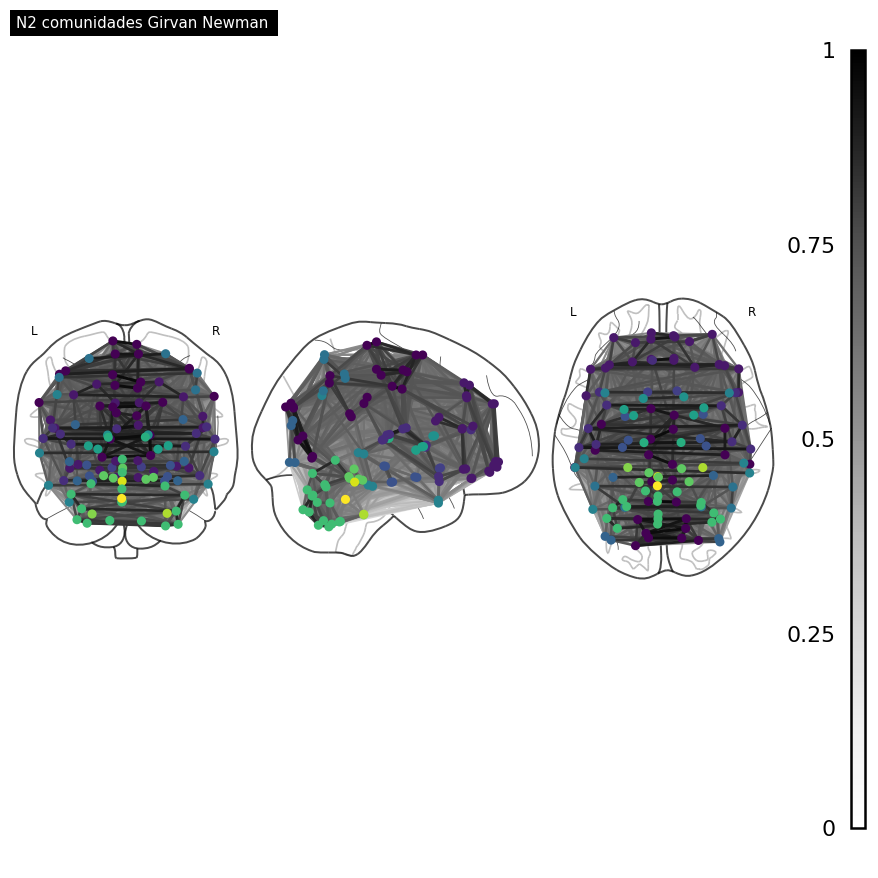

In [ ]:

fig = plt.figure(figsize = (12,12))
plotting.plot_connectome(avg_N2, coordinates,
                         edge_threshold="0%",
                         title='N2 comunidades Girvan Newman ',
                         display_mode = 'ortho', #‘ortho’, ‘x’, ‘y’, ‘z’, ‘xz’, ‘yx’, ‘yz’, ‘l’, ‘r’, ‘lr’, ‘lzr’, ‘lyr’, ‘lzry’, ‘lyrz’
                         edge_cmap = 'Greys',
                         edge_vmin = 0,
                         edge_vmax = 1,
                         figure = fig,
                         colorbar = True,
                         node_color = values_obs_girvan_newman)

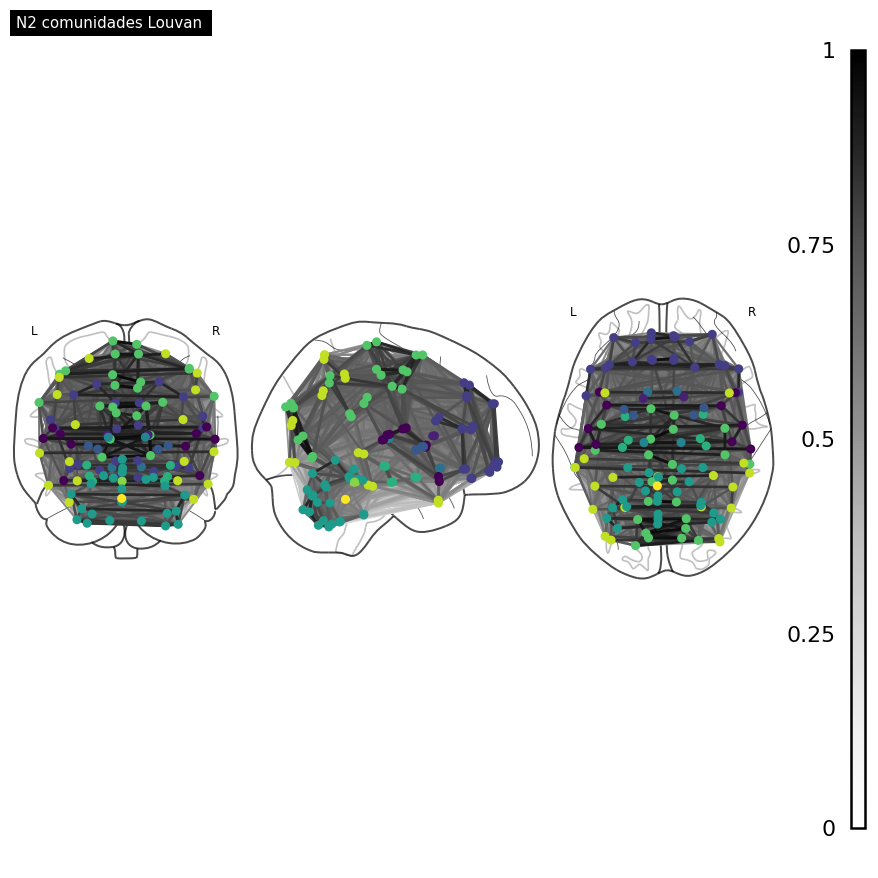

In [ ]:

fig = plt.figure(figsize = (12,12))
plotting.plot_connectome(avg_N2, coordinates,
                         edge_threshold="0%",
                         title='N2 comunidades Louvan ',
                         display_mode = 'ortho', #‘ortho’, ‘x’, ‘y’, ‘z’, ‘xz’, ‘yx’, ‘yz’, ‘l’, ‘r’, ‘lr’, ‘lzr’, ‘lyr’, ‘lzry’, ‘lyrz’
                         edge_cmap = 'Greys',
                         edge_vmin = 0,
                         edge_vmax = 1,
                         figure = fig,
                         colorbar = True,
                         node_color = values_obs_i)

In [ ]:
df= avg_N3
n = df.shape[0]
df -= np.diag(np.ones(n))
max_links = (n*n-n)//2
tril_idx = np.tril_indices(n,-1)
sorted_correlations = sorted(df.values[tril_idx].flatten(),reverse=True)
modularidad = []
num_comunidades = []
densidad = [] 
d = 0.075
idx = int(d*max_links)
threshold = sorted_correlations[idx]
      
G_av_N3_2=nx.from_pandas_adjacency(df>=threshold)


louvain_partition_i = community_louvain.best_partition(G_av_N3_2)
values_obs_i = [v for n,v in louvain_partition_i.items()]
modularidad_louvain_i = community_louvain.modularity(louvain_partition_i, G_av_N3_2)
modularidad.append(modularidad_louvain_i)
num_comunidades_louvain_i = max(values_obs_i)
num_comunidades.append(num_comunidades_louvain_i)
densidad.append(nx.density(G_av_N1_2))

  

In [ ]:
num_comunidades_louvain_i

9

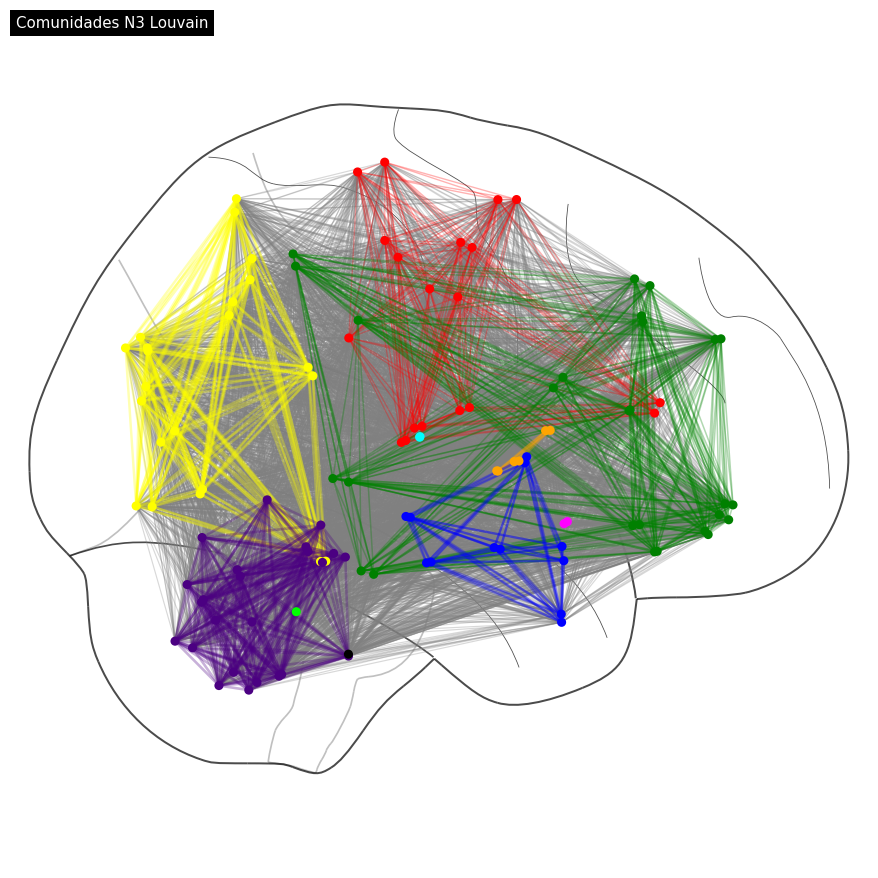

In [ ]:
color = {0:'red',1:'green',2:'orange',3:'magenta',4:'cyan',5:'blue',6:'yellow',7:"indigo", 8:"black",9:"lime",10:"blueviolet"} #colores de nodos
cmap = mpl.colors.ListedColormap(["grey","red","green","orange","magenta","cyan","blueviolet",'blue',"yellow","indigo","black","lime"])
    #"grey","red", "blue", "green", "orange","yellow","magenta","cyan","violet","black"]) #colores de vértices, tener en mente que el plot los usa de forma extraña
node_color = [color[v] for i,v in louvain_partition_i.items()]
figW = plt.figure(figsize = (12,12))
plotting.plot_connectome(color_coded_adyacency_matrix(louvain_partition_i), coordinates,
                         title='Comunidades N3 Louvain',
                         display_mode = 'x',
                         edge_cmap = cmap,
                         edge_vmin = 1,
                         edge_vmax = 11,
                         node_color = node_color,
                         edge_kwargs = {'alpha':0.3},
                         figure = figW);

In [ ]:
from networkx.algorithms import community

communities_generator_girvan_newman = community.girvan_newman(G_av_N3_2)
gn_partition =[]
modularidad_gn = []
for next_com_gn in communities_generator_girvan_newman:
  #print(next_com_gn)
  node_groups = []
  for com in next_com_gn:
      node_groups.append(list(com))

  girvan_newman_partition = {} #empty dic
  keys = range(116)

  for i in keys:
    value=-100
    for com in range(len(node_groups)):
      if i in node_groups[com]:
        value = com
        #print(i,com)
    girvan_newman_partition[i] = value
  gn_partition.append(girvan_newman_partition)
  modularidad_girvan_newman = community_louvain.modularity(girvan_newman_partition, G_av_N3_2)
  modularidad_gn.append(modularidad_girvan_newman)

In [ ]:
girvan_newman_partition = gn_partition[modularidad_gn.index(max(modularidad_gn))]
values_obs_girvan_newman = [v for n,v in girvan_newman_partition.items()]

In [ ]:
num_comunidades_girvan_newman_i = max(values_obs_girvan_newman)
num_comunidades_girvan_newman_i

10

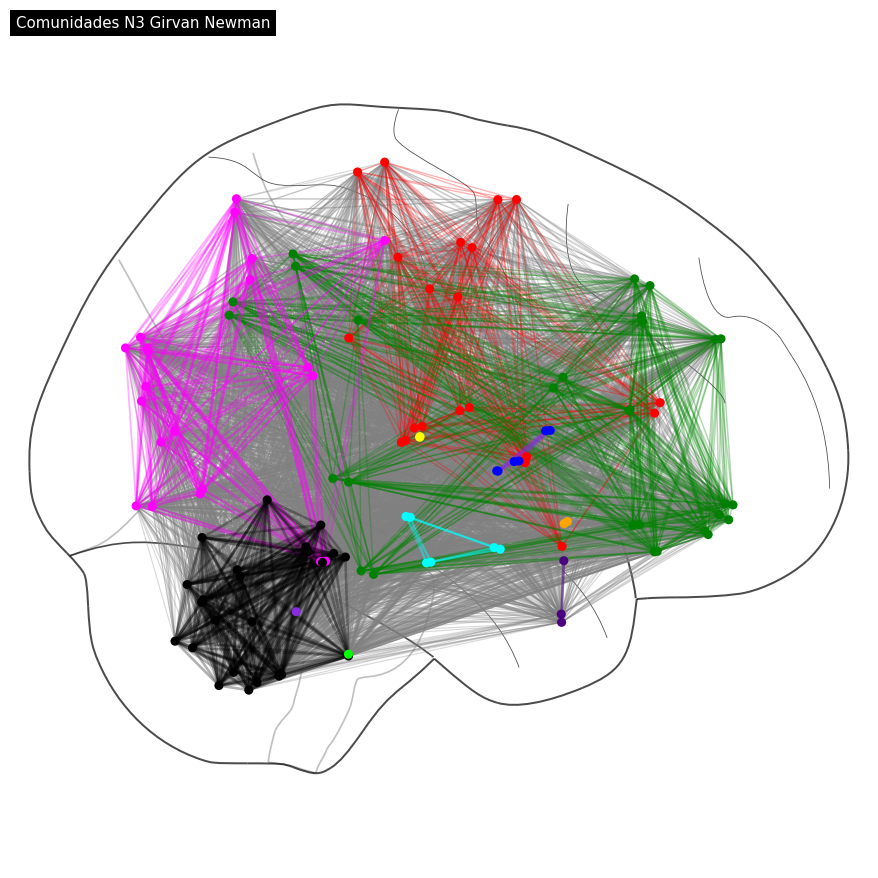

In [ ]:
color = {0:'red',1:'green',2:'orange',3:'magenta',4:'cyan',5:'blue',6:'yellow',7:"indigo", 8:"black",9:"lime",10:"blueviolet"} #colores de nodos
cmap = mpl.colors.ListedColormap(["grey","red","green","orange","magenta","cyan","blueviolet",'yellow',"indigo","black","blue","lime"])
    #"grey","red", "blue", "green", "orange","yellow","magenta","cyan","violet","black"]) #colores de vértices, tener en mente que el plot los usa de forma extraña
node_color = [color[v] for i,v in girvan_newman_partition.items()]
figW = plt.figure(figsize = (12,12))
plotting.plot_connectome(color_coded_adyacency_matrix(girvan_newman_partition), coordinates,
                         title='Comunidades N3 Girvan Newman',
                         display_mode = 'x',
                         edge_cmap = cmap,
                         edge_vmin = 1,
                         edge_vmax = 12,
                         node_color = node_color,
                         edge_kwargs = {'alpha':0.3},
                         figure = figW);

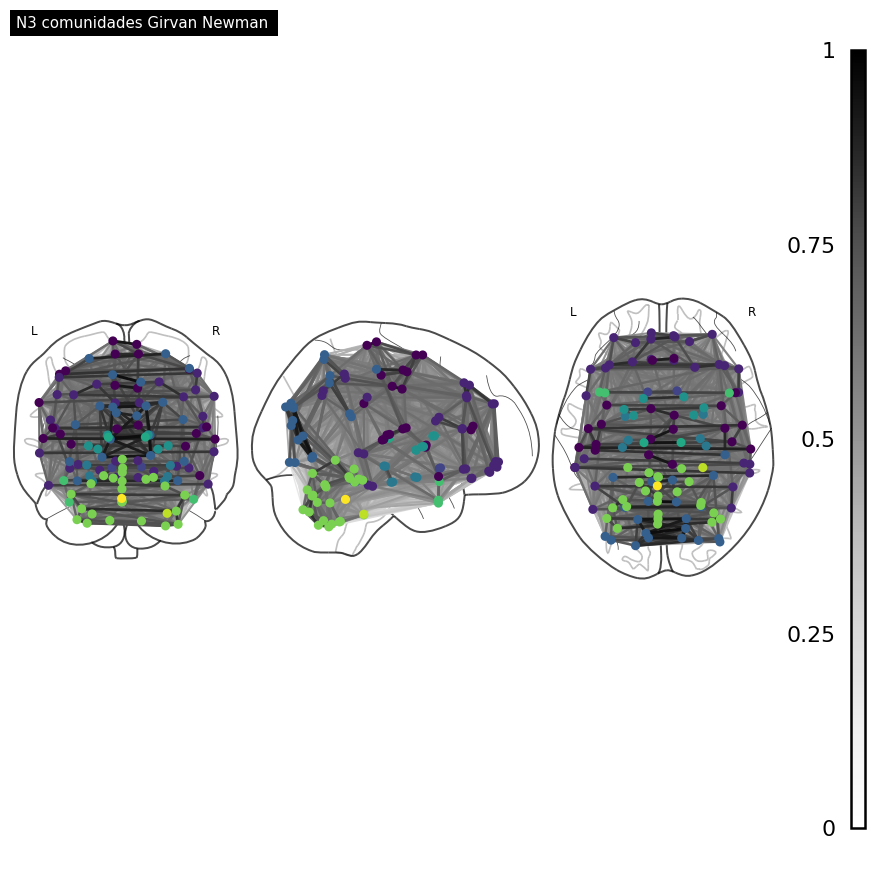

In [ ]:

fig = plt.figure(figsize = (12,12))
plotting.plot_connectome(avg_N3, coordinates,
                         edge_threshold="0%",
                         title='N3 comunidades Girvan Newman ',
                         display_mode = 'ortho', #‘ortho’, ‘x’, ‘y’, ‘z’, ‘xz’, ‘yx’, ‘yz’, ‘l’, ‘r’, ‘lr’, ‘lzr’, ‘lyr’, ‘lzry’, ‘lyrz’
                         edge_cmap = 'Greys',
                         edge_vmin = 0,
                         edge_vmax = 1,
                         figure = fig,
                         colorbar = True,
                         node_color = values_obs_girvan_newman)

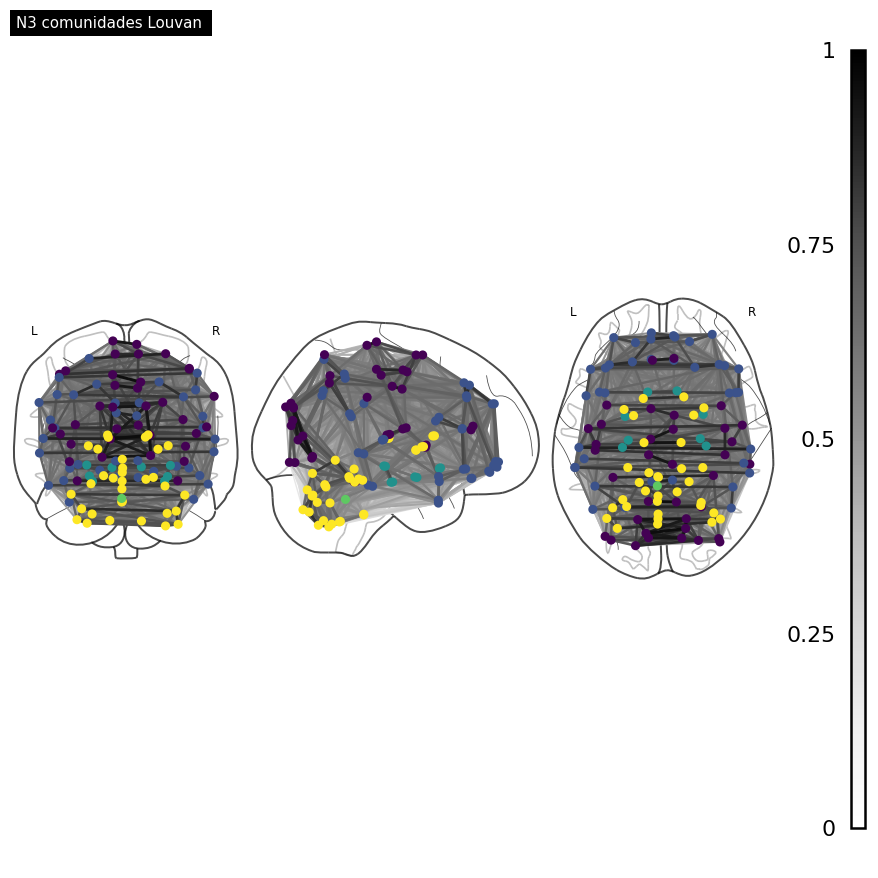

In [ ]:

fig = plt.figure(figsize = (12,12))
plotting.plot_connectome(avg_N3, coordinates,
                         edge_threshold="0%",
                         title='N3 comunidades Louvan ',
                         display_mode = 'ortho', #‘ortho’, ‘x’, ‘y’, ‘z’, ‘xz’, ‘yx’, ‘yz’, ‘l’, ‘r’, ‘lr’, ‘lzr’, ‘lyr’, ‘lzry’, ‘lyrz’
                         edge_cmap = 'Greys',
                         edge_vmin = 0,
                         edge_vmax = 1,
                         figure = fig,
                         colorbar = True,
                         node_color = values_obs_i)